<a href="https://colab.research.google.com/github/Gobihanath/DTect/blob/main/DTect_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import cv2

input_shape = (256, 256, 3)  # 3 means the rgb format


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Image_Width = 256
Image_Height = 256
Image_Size = (Image_Width, Image_Height)
Image_Channel = 3
batch_size=128

# Data Processing


## Note

In the context of the tf.keras.preprocessing.image_dataset_from_directory function, the seed parameter is used to set the seed for the random number generator that is responsible for shuffling the dataset. When shuffle is set to True, the dataset is randomly shuffled to ensure that the model doesn't learn patterns based on the order of the data.

Setting a seed ensures reproducibility, meaning that if you use the same seed value across different runs, you will get the same shuffled order of the dataset. This can be useful when you want to make your experiments or training runs reproducible, especially during the development and testing phases of your machine learning project.

In [ ]:
data_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Dataset/Dtect | Dataset | New",
    seed=123,         #If you want to ensure that the shuffling of your dataset is the same across different runs, you can keep the seed value constant. If you don't care about reproducibility, you can omit the seed parameter or use a different value for each run.
    shuffle=True,
    image_size=Image_Size,
    batch_size=batch_size,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 4481 files belonging to 10 classes.


In [ ]:
class_names = data_set.class_names
class_names

['Person 1',
 'Person 10',
 'Person 2',
 'Person 3',
 'Person 4',
 'Person 5',
 'Person 6',
 'Person 7',
 'Person 8',
 'Person 9']

In [ ]:
def get_dataset_partitions_tf(data_set, train_split=0.6, val_split=0.2, test_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(data_set)

    if shuffle:
        data_set = data_set.shuffle(shuffle_size, seed=123)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = data_set.take(train_size)
    val_ds = data_set.skip(train_size).take(val_size)
    test_ds = data_set.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(data_set)

print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

21
7
8


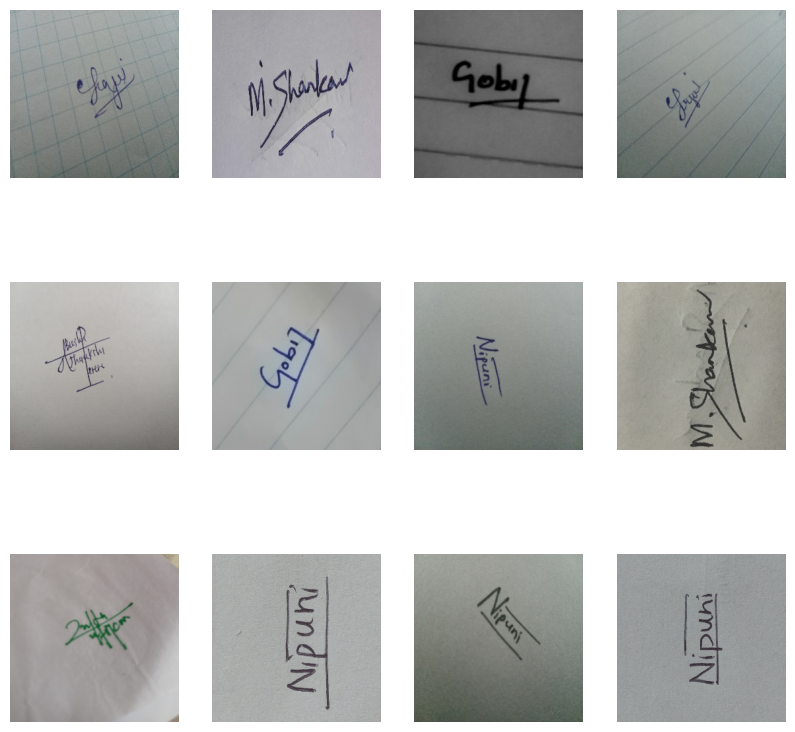

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in data_set.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 256, 256, 3)
(128, 10)


# Creating the model

In [ ]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=input_shape))

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history  = model.fit(
    train_ds,
    batch_size=128,
    validation_data=val_ds,
    validation_steps = 7,
    verbose=1,
    epochs=10,
)

Epoch 1/10
21/21 [==============================] - 631s 22s/step - loss: 3.6556 - accuracy: 0.1447 - val_loss: 2.0092 - val_accuracy: 0.1998
Epoch 2/10
21/21 [==============================] - 622s 22s/step - loss: 1.8846 - accuracy: 0.3452 - val_loss: 1.6359 - val_accuracy: 0.4408
Epoch 3/10
21/21 [==============================] - 614s 21s/step - loss: 1.7632 - accuracy: 0.4088 - val_loss: 1.5845 - val_accuracy: 0.4364
Epoch 4/10
21/21 [==============================] - 630s 22s/step - loss: 1.4108 - accuracy: 0.5019 - val_loss: 1.0991 - val_accuracy: 0.5893
Epoch 5/10
21/21 [==============================] - 614s 22s/step - loss: 1.1676 - accuracy: 0.6099 - val_loss: 1.4059 - val_accuracy: 0.4788
Epoch 6/10
21/21 [==============================] - 624s 22s/step - loss: 1.5254 - accuracy: 0.4885 - val_loss: 1.2067 - val_accuracy: 0.5893
Epoch 7/10
21/21 [==============================] - 608s 21s/step - loss: 1.0615 - accuracy: 0.6451 - val_loss: 0.8059 - val_accuracy: 0.7578
Epoch 

In [ ]:
model.save('Dtect_model1.h5')

In [ ]:
model.save('Detect-Mdel.keras')

In [ ]:
model.save('Detect-Mdel.json')

In [ ]:
model= tf.keras.models.load_model('/content/Dtect_model1.h5')

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 161ms/step


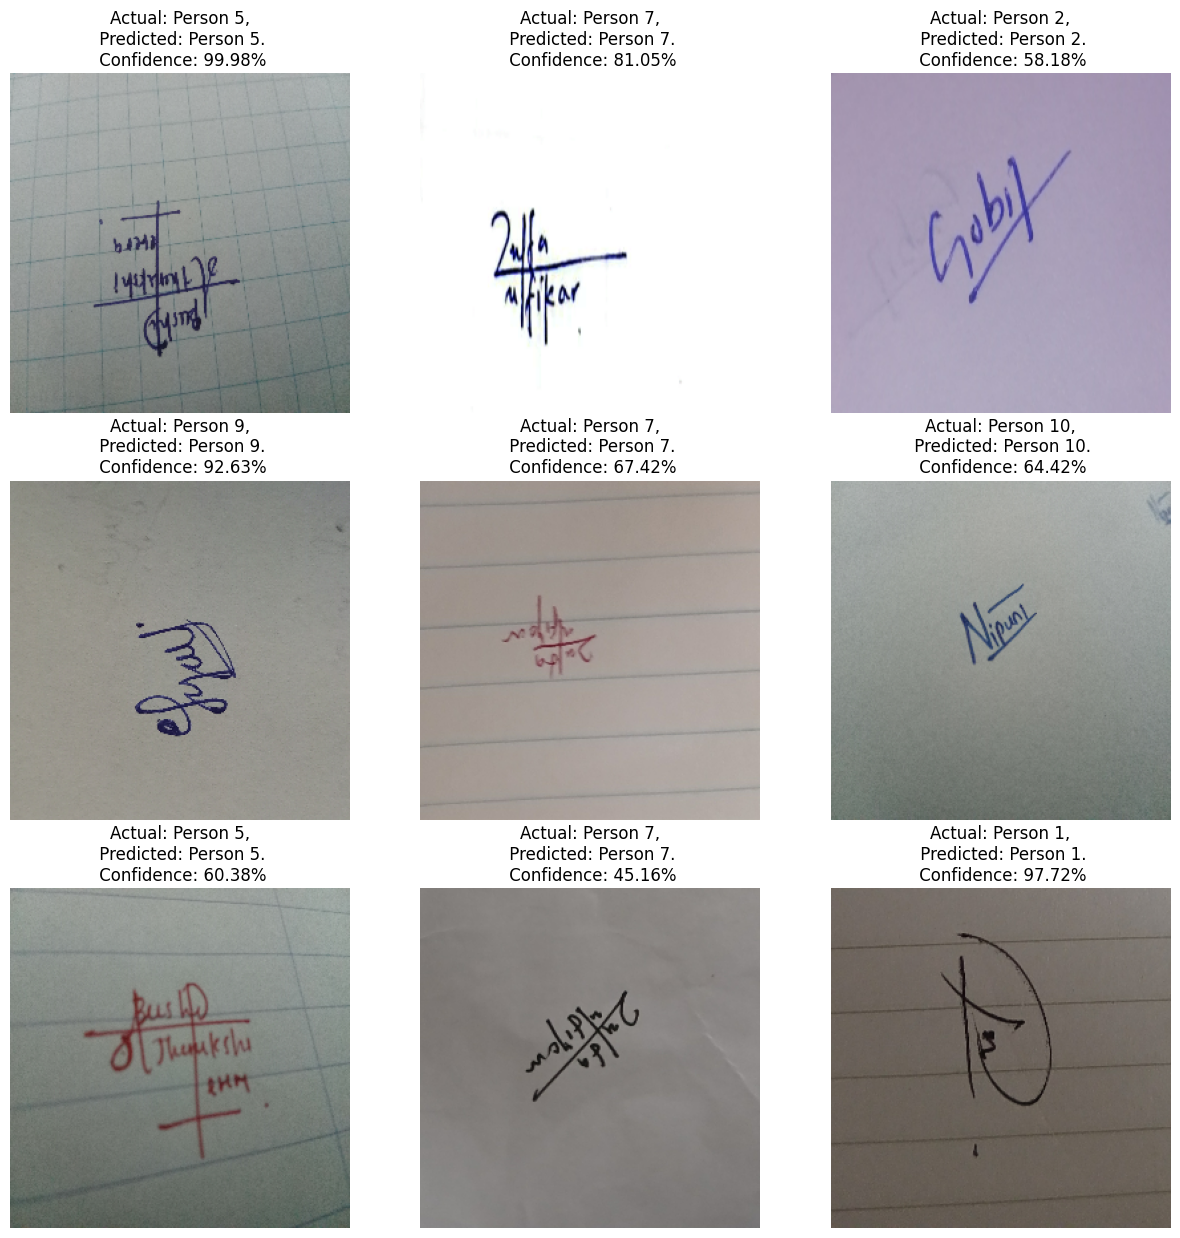

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i].numpy().argmax()]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
image_path="/content/drive/MyDrive/Testimg.jpg"

image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
image_array = tf.keras.preprocessing.image.img_to_array(image)

# Add a batch dimension
image_batch = np.expand_dims(image_array, axis=0)

# Make prediction using the model
predictions = model.predict(image_batch)

# Print the predictions
print(predictions)



1/1 [==============================] - 0s 47ms/step
[[1.2847047e-03 1.7605852e-02 5.4949024e-03 1.2872370e-01 1.4343785e-04
  7.4364924e-01 2.9547645e-02 6.0900379e-02 5.7185524e-08 1.2650140e-02]]


# Checking Images with a loop


In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('Dtect_model1.h5')

# List of file paths for the 10 signature images
signature_files = ['/content/drive/MyDrive/T1.jpg', '/content/drive/MyDrive/T2.jpg', '/content/drive/MyDrive/T3.jpg','/content/drive/MyDrive/T4.jpg']


for signature_file in signature_files:
    img = image.load_img(signature_file, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image data if needed
    # img_array = img_array / 255.0  # Example normalization, adjust based on your training data

    # Make prediction
    predictions = model.predict(img_array)

    # Get the predicted class
    predicted_class = np.argmax(predictions)

    # Compare with ground truth or expected class (you might need a ground truth list)


    # Print the result
    if predicted_class == expected_class:
        print(f"{signature_file}: Correct Prediction!")
    else:
        print(f"{signature_file}: Incorrect Prediction. Expected class: {expected_class}, Predicted class: {predicted_class}")

OSError: No file or directory found at Dtect_model1.h5

## Making predictions 1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np

# Load your pre-trained model
model = keras.models.load_model('your_model_path')

# Assuming your model expects images of a certain size, adjust as needed
img_size = (256, 256)

# preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize(img_size)
    img_array = np.array(img) / 255.0  # Normalize pixel values to be between 0 and 1
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# check if image is predictable and print results
def check_image(image_path, threshold=0.5):
    img_array = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(img_array)

    # Calculate accuracy
    max_prob = np.max(predictions)
    predicted_class = np.argmax(predictions)

    # Check if image is predictable to one of the 10 classes
    if max_prob > threshold:
        print(f"Verified - Predicted class: {predicted_class}, Accuracy: {max_prob}")
    else:
        print("Not Verified - Image does not match trained classes")

# Example usage
image_path = 'path_to_your_image.jpg'
check_image(image_path)


#Here lets use for loop for checking 10 images in a loop
image_paths = ['/path/to/image1.jpg', '/path/to/image2.jpg', '/path/to/image3.jpg']

for image_path in image_paths:
    check_image(image_path)





## Make Predictions 2

In [ ]:
# List of image paths
image_paths = ['/path/to/image1.jpg', '/path/to/image2.jpg', '/path/to/image3.jpg']

# Function to check if image is predictable and print results
def check_image(image_path, threshold=0.5):
    img_array = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(img_array)

    # Calculate accuracy
    max_prob = np.max(predictions)
    predicted_class = np.argmax(predictions)

    # Check if image is predictable to one of the 10 classes
    if max_prob > threshold:
        print(f"Verified - Image: {os.path.basename(image_path)}, Predicted class: {predicted_class}, Accuracy: {max_prob}")
    else:
        print(f"Not Verified - Image: {os.path.basename(image_path)}, Does not match trained classes")

# Iterate over each image path in the list and check predictions
for image_path in image_paths:
    check_image(image_path)
